<a href="https://colab.research.google.com/github/roshiniRK/basic-nn-model/blob/main/dl_exp01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread

In [ ]:
from google.auth import default
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)
worksheet=gc.open("data").sheet1
df=worksheet.get_all_values()
print(df)

[['input', 'output'], ['1', '9'], ['2', '14'], ['3', '19'], ['4', '24'], ['5', '29'], ['6', '34'], ['7', '39'], ['8', '44'], ['9', '49'], ['10', '54'], ['11', '59'], ['12', '64'], ['13', '69'], ['14', '74'], ['15', '79'], ['16', '84'], ['17', '89'], ['18', '94'], ['19', '99'], ['20', '104']]


In [ ]:
ds1=pd.DataFrame(df[1:],columns=df[0])
ds1=ds1.astype({'input':'float'})
ds1=ds1.astype({'output':'float'})
ds1.head()

,input,output
0,1.0,9.0
1,2.0,14.0
2,3.0,19.0
3,4.0,24.0
4,5.0,29.0


In [ ]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   20 non-null     float64
 1   output  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [ ]:
ds1.describe()

,input,output
count,20.00000,20.000000
mean,10.50000,56.500000
std,5.91608,29.580399
min,1.00000,9.000000
25%,5.75000,32.750000
50%,10.50000,56.500000
75%,15.25000,80.250000
max,20.00000,104.000000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3606.1709
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 3603.5815
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3601.6812
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3600.0808
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3598.6587
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3597.3499
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3596.1248
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3594.9612
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3593.8518
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3592.7815
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3591.7417
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3590.7227
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3589.7214
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3588.7419
Epoch 15/2000
1/1 ━━━━━━━━━━━━

array([[83.36487]], dtype=float32)

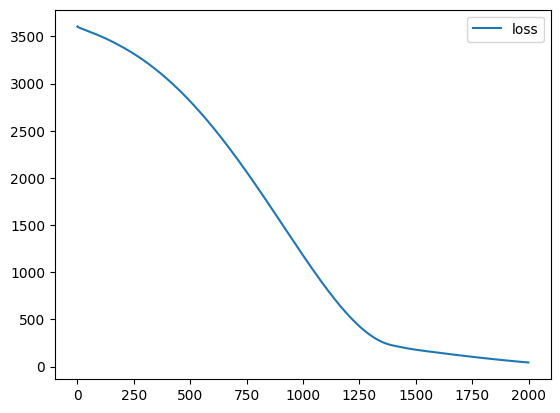

In [ ]:
x = ds1[['input']].values
y = ds1[['output']].values
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=33)
scaler=MinMaxScaler()
scaler.fit(x_train)
xtrain=scaler.transform(x_train)
model=Sequential([Dense(8,activation="relu",input_shape=[1]),Dense(10,activation="relu"),Dense(1)])
model.compile(optimizer='rmsprop',loss='mse')
model.fit(xtrain,y_train,epochs=2000)
cf=pd.DataFrame(model.history.history)
cf.plot()
xtrain=scaler.transform(x_test)
model.evaluate(xtrain,y_test)
n=[[17]]
n=scaler.transform(n)
model.predict(n)